<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/AxelDavid_1103210017_TK4504_EDA_ITSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/ITSalary2020.csv'
df = pd.read_csv(file_path)
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [4]:
selected_columns = ["Total years of experience",
                    "Years of experience in Germany",
                    "Yearly bonus + stocks in EUR",
                    "Annual bonus+stocks one year ago. Only answer if staying in same country",
                    "Number of vacation days",
                    "Contract duration",
                    "Company size"]
print(df.head())

             Timestamp   Age Gender    City           Position   \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

  Your main technology / programming language  \
0                                  TypeScript   
1                             

In [6]:
numeric_columns = ["Total years of experience",
                     "Years of experience in Germany",
                     "Yearly bonus + stocks in EUR",
                     "Annual bonus+stocks one year ago. Only answer if staying in same country",
                     "Number of vacation days"]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(df[numeric_columns].head())

   Total years of experience  Years of experience in Germany  \
0                        5.0                             3.0   
1                        7.0                             4.0   
2                       12.0                             6.0   
3                        4.0                             1.0   
4                       17.0                             6.0   

   Yearly bonus + stocks in EUR  \
0                        5000.0   
1                           NaN   
2                      120000.0   
3                           NaN   
4                           NaN   

   Annual bonus+stocks one year ago. Only answer if staying in same country  \
0                                            10000.0                          
1                                             5000.0                          
2                                           100000.0                          
3                                                NaN                          
4        

In [7]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

                Timestamp   Age Gender         City  \
0     24/11/2020 11:14:15  26.0   Male       Munich   
1     24/11/2020 11:14:16  26.0   Male       Berlin   
2     24/11/2020 11:14:21  29.0   Male       Berlin   
3     24/11/2020 11:15:24  28.0   Male       Berlin   
4     24/11/2020 11:15:46  37.0   Male       Berlin   
...                   ...   ...    ...          ...   
1247  18/01/2021 11:50:02  34.0   Male       Zurich   
1248  18/01/2021 15:05:50  31.0   Male       Berlin   
1249  18/01/2021 17:46:02  33.0   Male       Berlin   
1250  18/01/2021 23:20:35  39.0   Male       Munich   
1251  19/01/2021 10:17:58  26.0   Male  Saarbrücken   

                                   Position   Total years of experience  \
0                          Software Engineer                        5.0   
1                          Backend Developer                        7.0   
2                          Software Engineer                       12.0   
3                         Frontend Deve

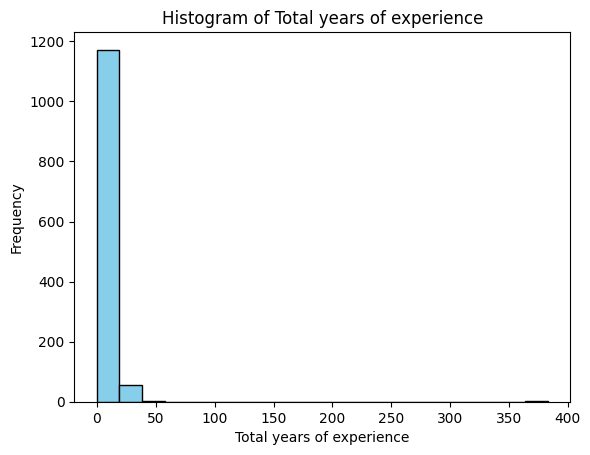

In [8]:
plt.hist(df['Total years of experience'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total years of experience')
plt.ylabel('Frequency')
plt.title('Histogram of Total years of experience')
plt.show()

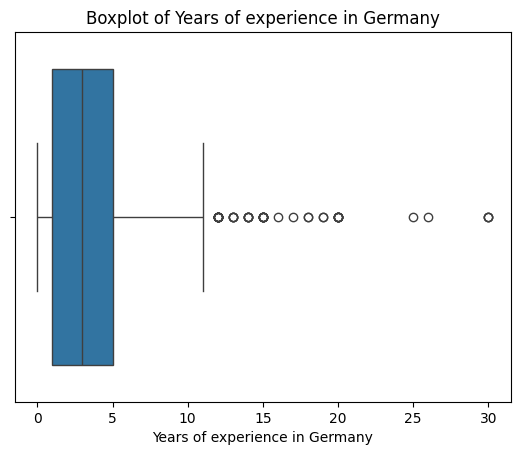

In [9]:
sns.boxplot(x=df['Years of experience in Germany'])
plt.xlabel('Years of experience in Germany')
plt.title('Boxplot of Years of experience in Germany')
plt.show()

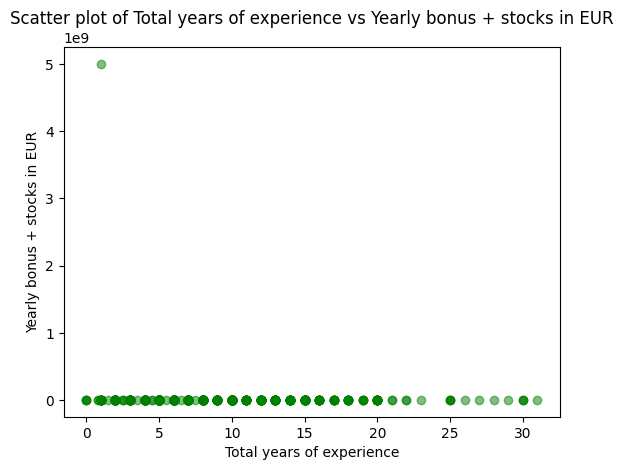

In [10]:
plt.scatter(df['Total years of experience'], df['Yearly bonus + stocks in EUR'], color='green', alpha=0.5)
plt.xlabel('Total years of experience')
plt.ylabel('Yearly bonus + stocks in EUR')
plt.title('Scatter plot of Total years of experience vs Yearly bonus + stocks in EUR')
plt.show()

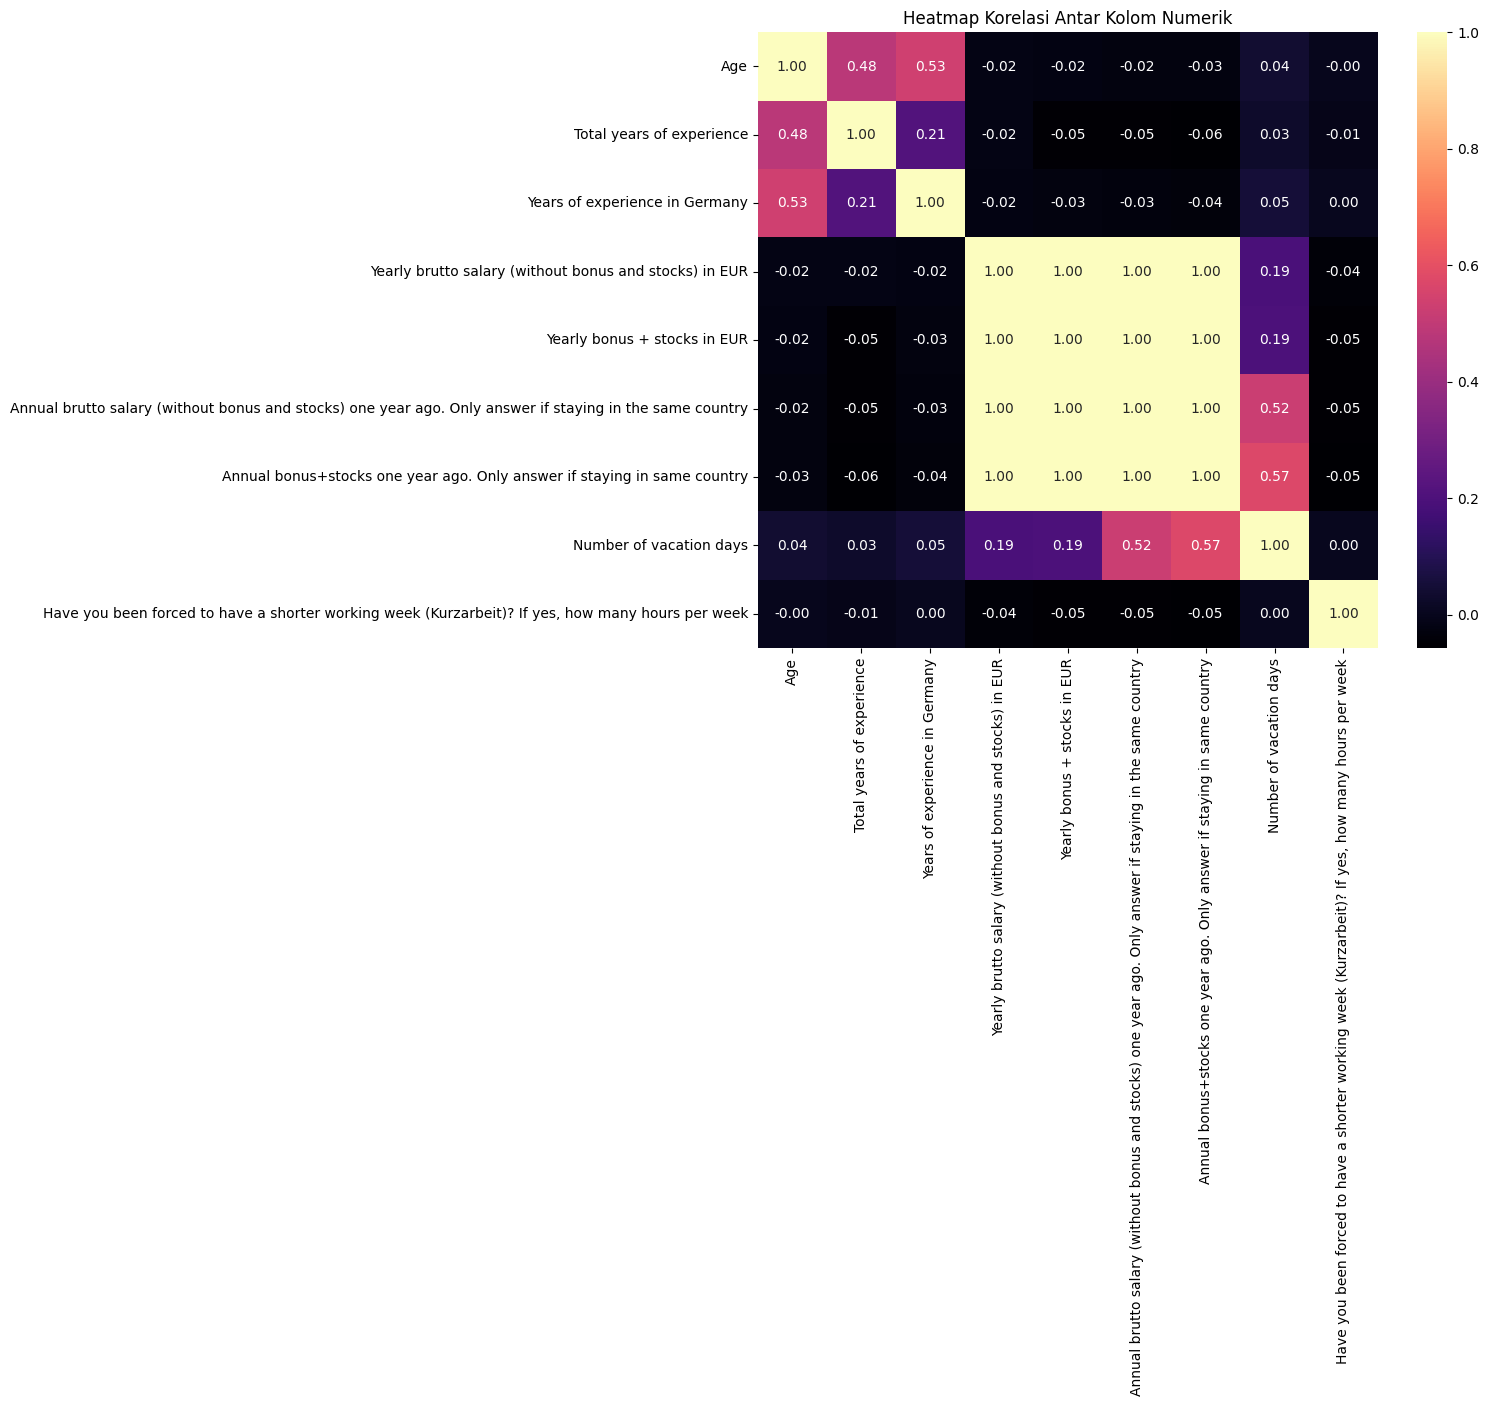

In [14]:
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()